<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Suppress TensorFlow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# uncomment and run the following lines in case Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
ds = pd.read_csv("C:/Users/likhi/Downloads/Churn.csv")    # complete the code to load the dataset

## Data Overview

### View the first and last 5 rows of the dataset.

In [4]:
# let's view the first 5 rows of the data
ds.head() ##  Complete the code to view top 5 rows of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# let's view the last 5 rows of the data
ds.tail() ##  Complete the code to view last 5 rows of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [6]:
ds.shape

(10000, 14)

In [7]:
# Checking the number of rows and columns in the training data
ds.describe() ##  Complete the code to view dimensions of the train data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Check the data types of the columns for the dataset

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the Statistical Summary

In [9]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [10]:
# let's check for missing values in the data
ds.isnull().sum() ##  Complete the code to check missing entries in the train data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking for unique values for each of the column

In [11]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

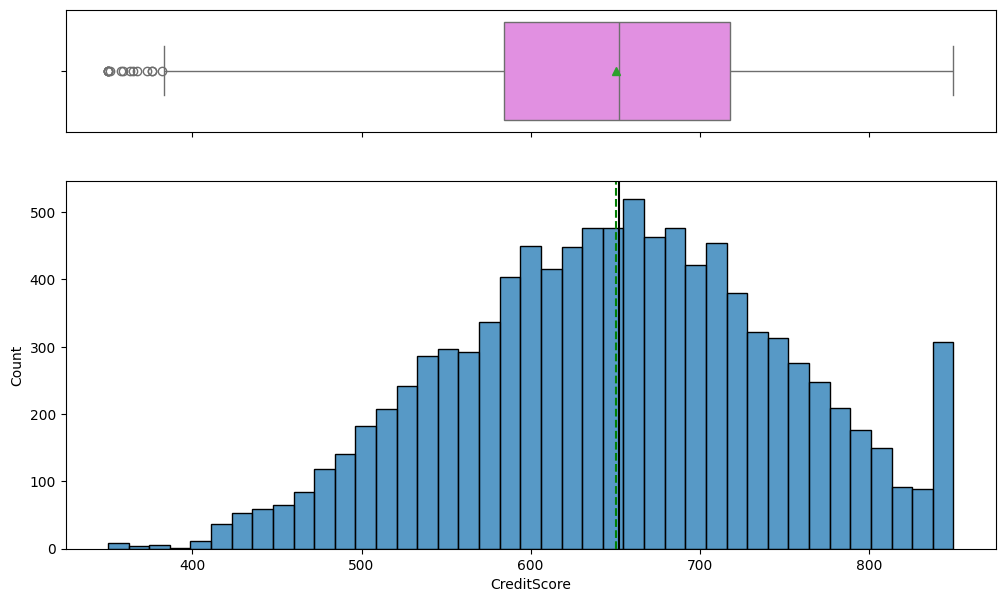

In [15]:
histogram_boxplot(ds,'CreditScore')

#### Observations on Age

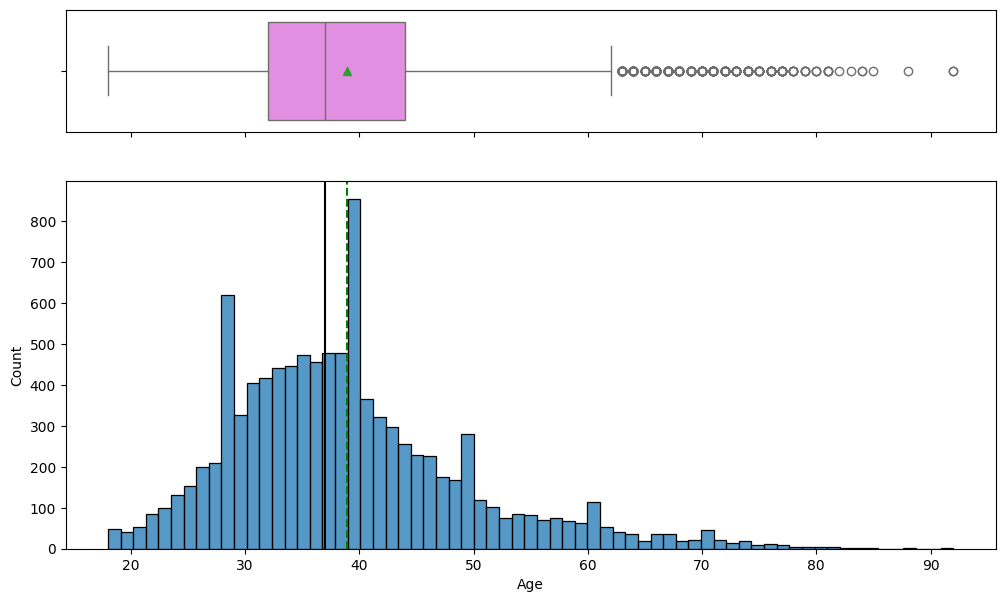

In [16]:
histogram_boxplot(ds,'Age')          ## Complete the code to create histogram_boxplot for Age

#### Observations on Balance

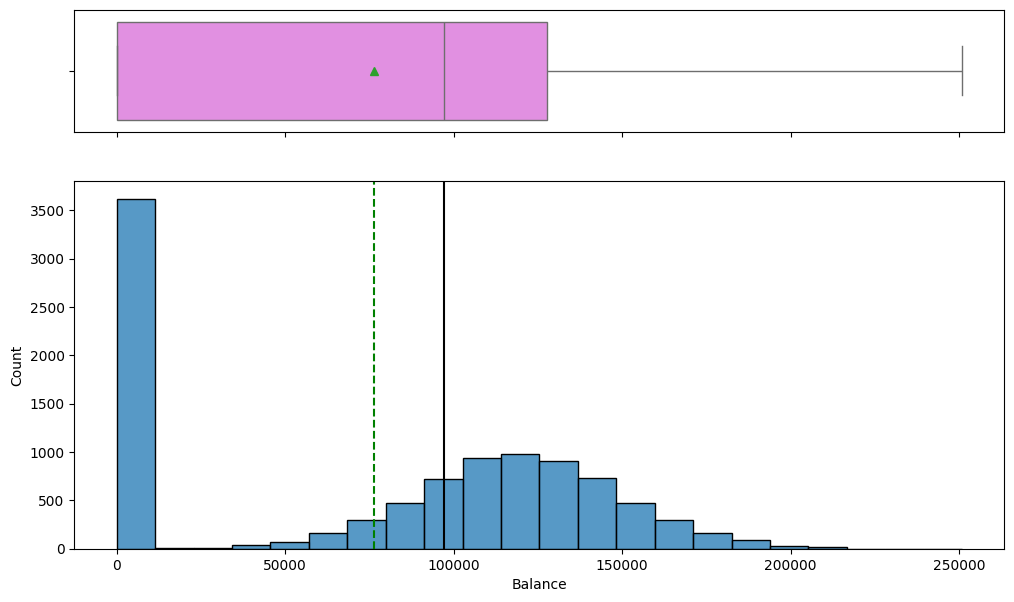

In [17]:
histogram_boxplot(ds,'Balance')          ## Complete the code to create histogram_boxplot for Balance

#### Observations on Estimated Salary

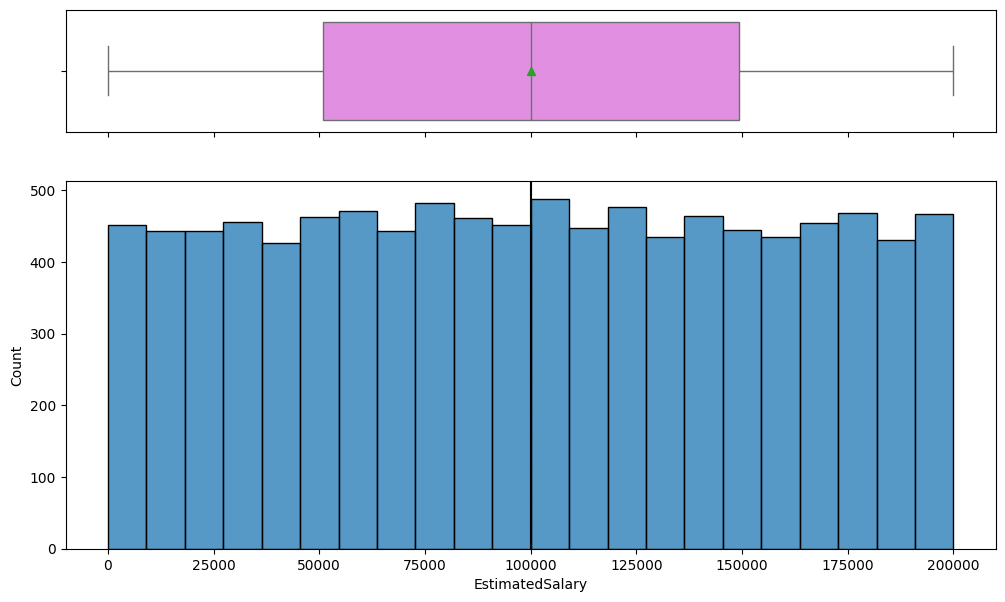

In [18]:
histogram_boxplot(ds,'EstimatedSalary')          ## Complete the code to create histogram_boxplot for Estimated Salary

#### Observations on Exited

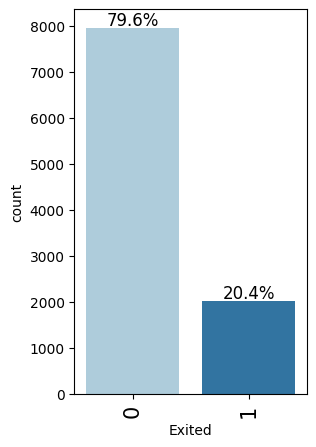

In [19]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations on Geography

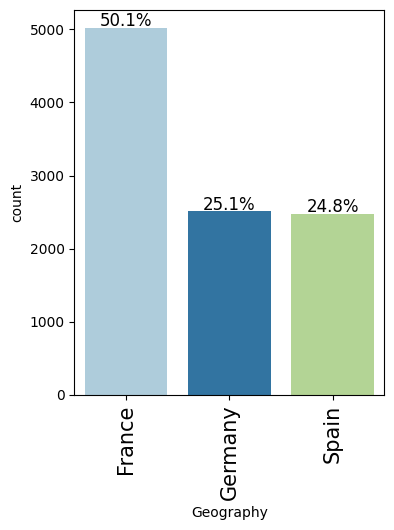

In [20]:
labeled_barplot(ds, 'Geography', perc=True)               ## Complete the code to create labeled_barplot for Geography

#### Observations on Gender

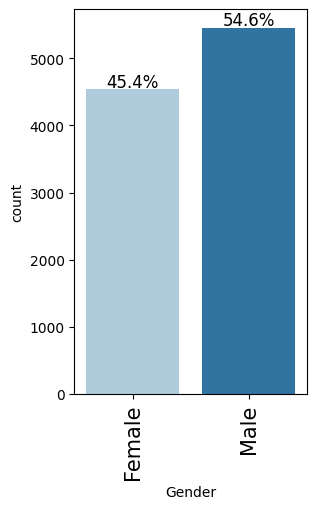

In [21]:
labeled_barplot(ds,'Gender',perc=True)               ## Complete the code to create labeled_barplot for Gender

#### Observations on Tenure

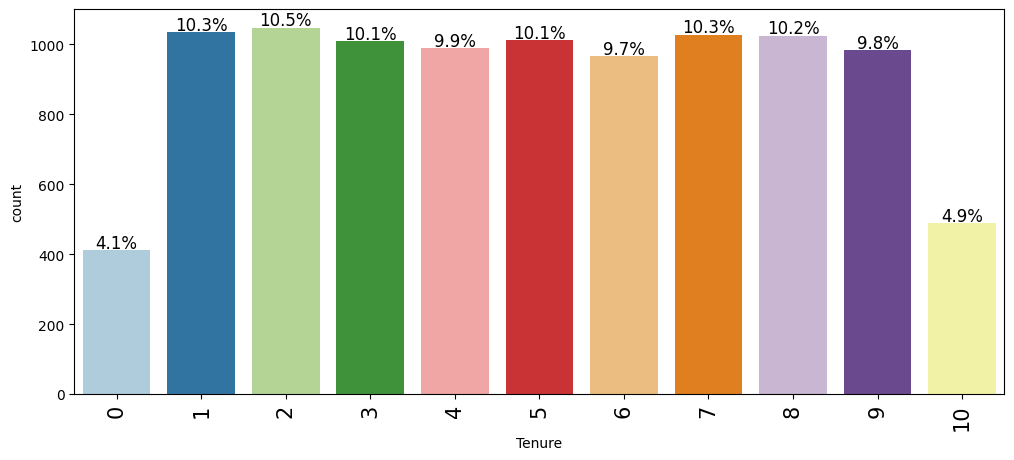

In [22]:
labeled_barplot(ds,'Tenure',perc=True)               ## Complete the code to create labeled_barplot for Tenure

#### Observations on Number of Products

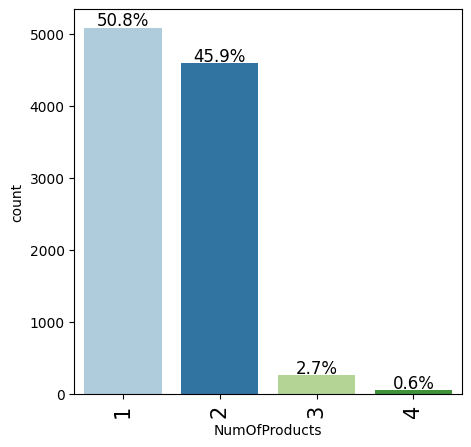

In [23]:
labeled_barplot(ds, 'NumOfProducts',perc=True)               ## Complete the code to create labeled_barplot for Number of products

#### Observations on Has Credit Card

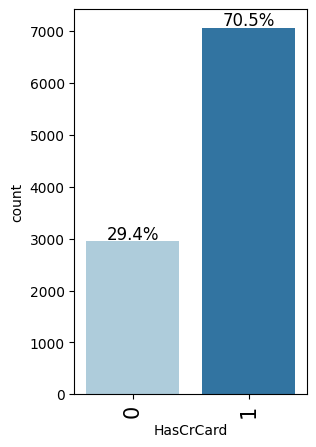

In [24]:
labeled_barplot(ds,'HasCrCard',perc=True)               ## Complete the code to create labeled_barplot for Has credit card

#### Observations on Is Active Member

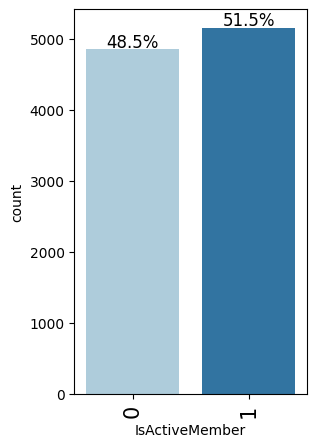

In [25]:
labeled_barplot(ds,'IsActiveMember',perc=True)               ## Complete the code to create labeled_barplot for Is active member

### Bivariate Analysis

In [26]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [27]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

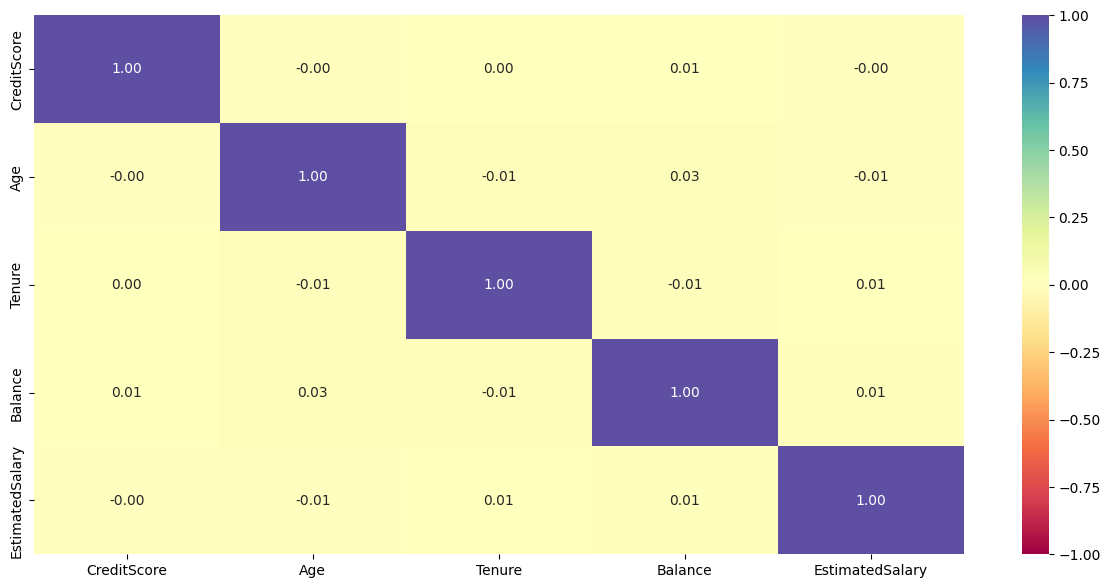

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


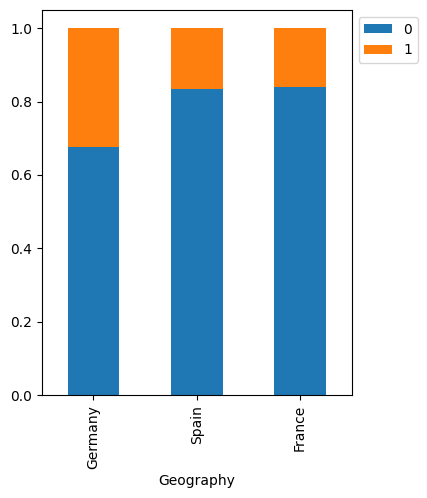

In [29]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Gender

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


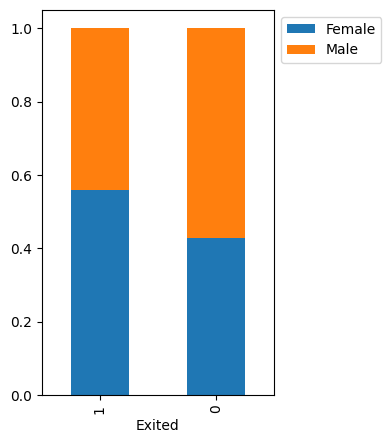

In [30]:
stacked_barplot(ds,"Exited", "Gender")                   ## Complete the code to plot stacked barplot for Exited and Gender

#### Exited Vs Has Credit Card

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


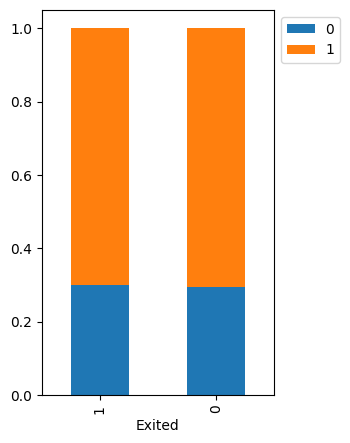

In [31]:
stacked_barplot(ds,"Exited","HasCrCard")                   ## Complete the code to plot stacked barplot for Exited and Has credit card

#### Exited Vs Is active member

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


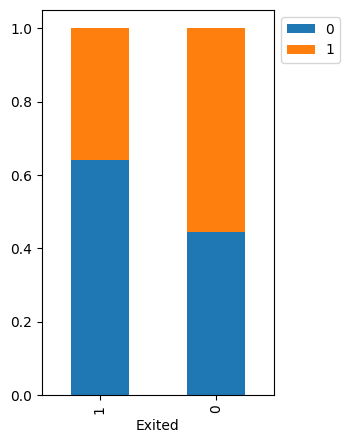

In [32]:
stacked_barplot(ds,'Exited','IsActiveMember')                   ## Complete the code to plot stacked barplot for Exited and Is active member

#### Exited Vs Credit Score

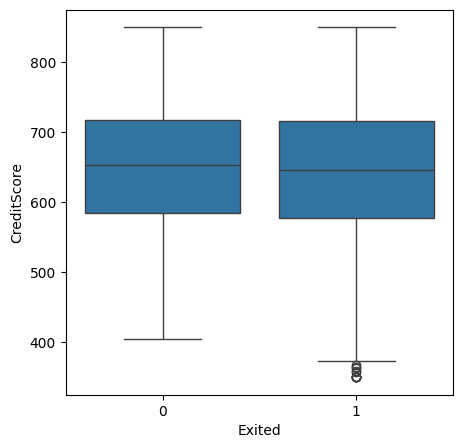

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

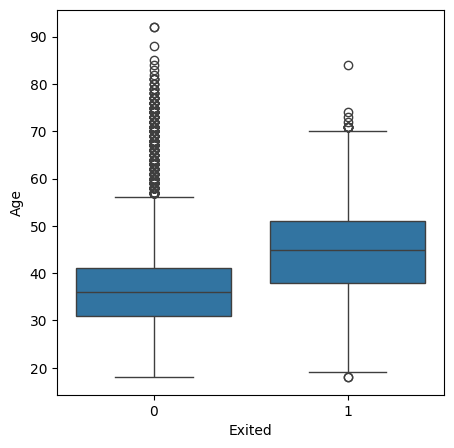

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Age
plt.show()

#### Exited Vs Tenure

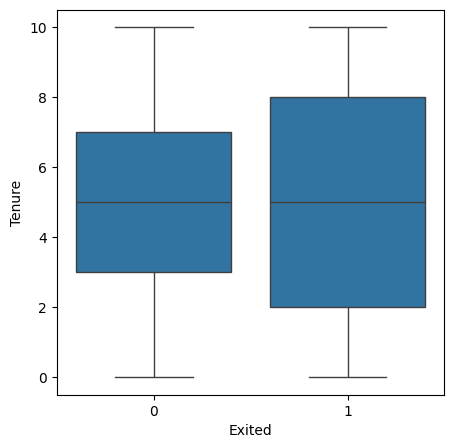

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Tenure
plt.show()

#### Exited Vs Balance

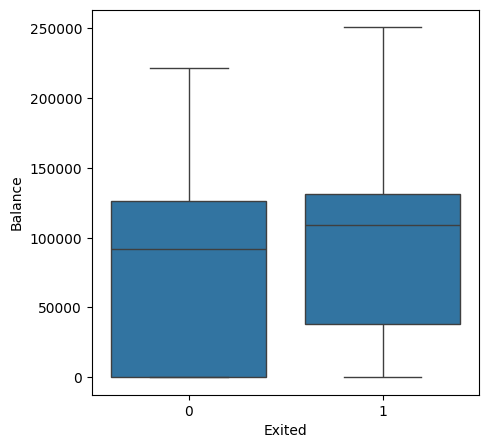

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Balance
plt.show()

#### Exited Vs Number of Products

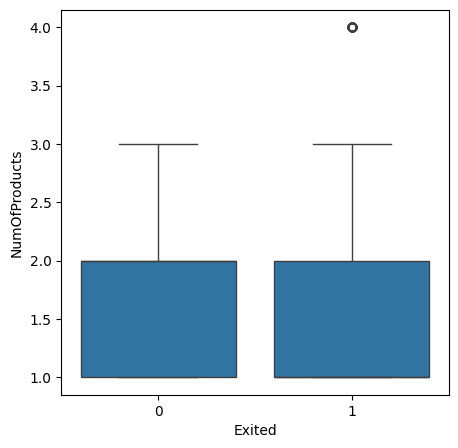

In [37]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Number of products
plt.show()

#### Exited Vs Estimated Salary

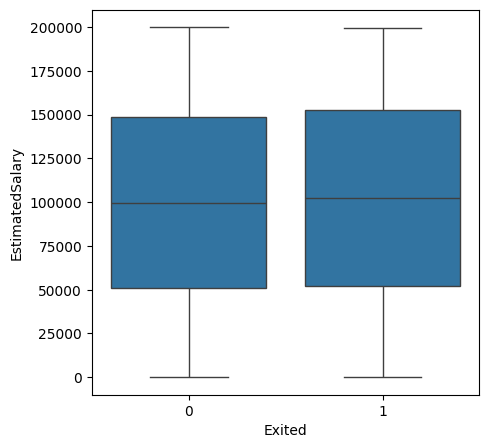

In [38]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [39]:
ds.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

In [41]:
ds.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


### Train-validation-test Split

In [42]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [43]:
X.shape, y.shape

((10000, 11), (10000,))

In [44]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [45]:
X_large.shape, X_test.shape, y_large.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [46]:
# Splitting the dataset into the Training and validation set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.20, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [47]:
X_train.shape, X_val.shape, X_test.shape

((6400, 11), (1600, 11), (2000, 11))

### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [48]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])    ## Complete the code to specify the columns to normalize
X_test[cols_list] = sc.transform(X_test[cols_list])    ## Complete the code to specify the columns to normalize

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


**Let's create a function for plotting the confusion matrix**



In [49]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [50]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [51]:
backend.clear_session() #This function is typically used in Keras (a high-level API of TensorFlow) to clear the current computational graph.
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [52]:
X_train.shape[1]

11

In [53]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(128, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [54]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
#In the context of customer churn prediction for a bank, maximizing recall ensures that the model identifies as many customers who 
#are likely to churn as possible, allowing the bank to take proactive measures to retain them.

# choose recall if the focus is on correctly identifying customers who are likely to churn (i.e., minimizing false negatives)

# uncomment one of the following lines to define the metric to be used
metric = 'Recall'
#metric = keras.metrics.Recall()
#metric = keras.metrics.Precision()
#metric = keras.metrics.F1Score()

In [55]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

#Binary cross-entropy is commonly used as the loss function for binary classification tasks, where the goal is to predict between two classes 

In [56]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Fitting the ANN
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=10,    ## Complete the code to specify the batch size to use #Specifies the number of samples per gradient update during training (here set to 10).
    validation_data=(X_val,y_val),
    epochs=10,    ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/10


640/640 [==============================] - 4s 3ms/step - loss: 0.5766 - recall: 0.1357 - val_loss: 0.5052 - val_recall: 0.0000e+00
Epoch 2/10
640/640 [==============================] - 2s 3ms/step - loss: 0.4840 - recall: 0.0000e+00 - val_loss: 0.4769 - val_recall: 0.0000e+00
Epoch 3/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4690 - recall: 0.0000e+00 - val_loss: 0.4690 - val_recall: 0.0000e+00
Epoch 4/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4624 - recall: 0.0000e+00 - val_loss: 0.4637 - val_recall: 0.0000e+00
Epoch 5/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4572 - recall: 0.0000e+00 - val_loss: 0.4593 - val_recall: 0.0000e+00
Epoch 6/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4528 - recall: 7.6687e-04 - val_loss: 0.4556 - val_recall: 0.0000e+00
Epoch 7/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4491 - recall: 0.0015 - val_loss: 0.4525 - val_rec

**Loss function**
 
 loss (also known as cost or objective) is a measure of how well the model's predictions match the true labels or targets in the training data.

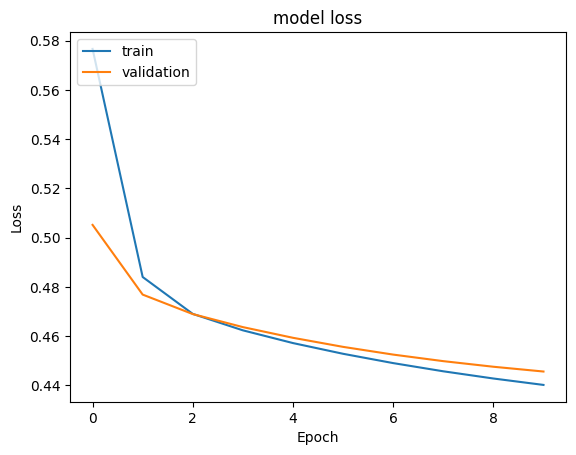

In [58]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

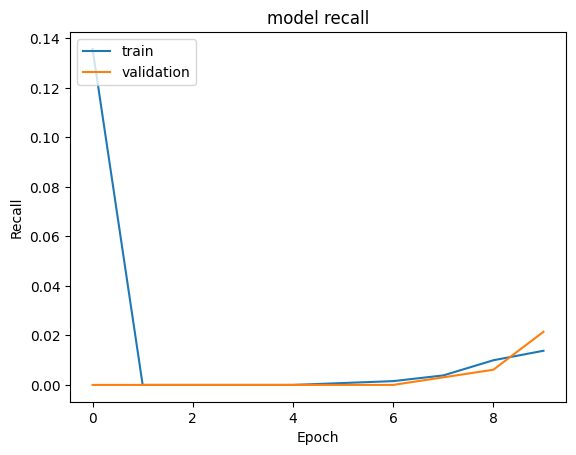

In [59]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [60]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train) #computes the predicted probabilities for each sample in the training data. 
#Since the output layer of the neural network uses a sigmoid activation function (sigmoid), the predicted probabilities range between 0 and 1.
y_train_pred = (y_train_pred > 0.5) #This means that any predicted probability above 0.5 is considered as class 1 (positive class), 
#and any probability below 0.5 is considered as class 0 (negative class).
y_train_pred

200/200 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [61]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [62]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [63]:
train_metric_df, valid_metric_df

(               recall
 NN with SGD  0.023006,
                recall
 NN with SGD  0.021472)

**Classification report**

In [64]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      5096
         1.0       0.58      0.02      0.04      1304

    accuracy                           0.80      6400
   macro avg       0.69      0.51      0.47      6400
weighted avg       0.75      0.80      0.72      6400



In [65]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      1274
         1.0       0.47      0.02      0.04       326

    accuracy                           0.80      1600
   macro avg       0.63      0.51      0.46      1600
weighted avg       0.73      0.80      0.71      1600



**Confusion matrix**

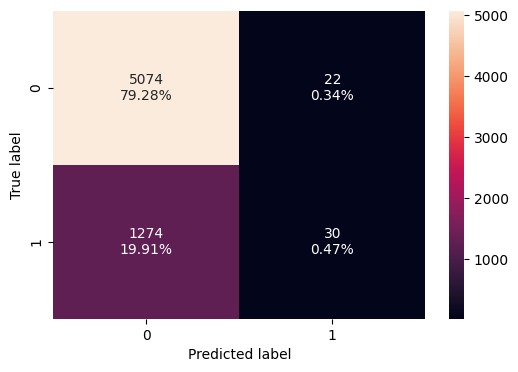

In [66]:
make_confusion_matrix(y_train, y_train_pred)

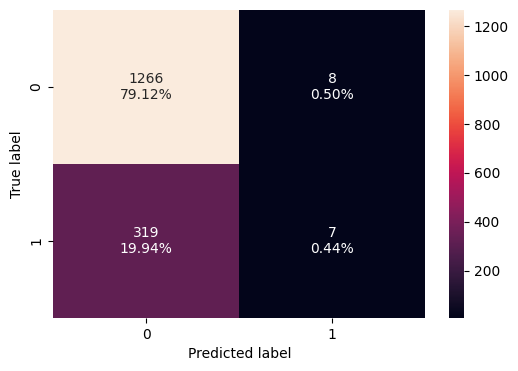

In [67]:
make_confusion_matrix(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [68]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [69]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(128, activation='relu'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation='sigmoid'))

In [70]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
metric = 'Recall'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [71]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [72]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size= 10, ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs= 10, ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/10
640/640 [==============================] - 3s 3ms/step - loss: 0.4316 - recall: 0.2071 - val_loss: 0.4199 - val_recall: 0.2178
Epoch 2/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3931 - recall: 0.3543 - val_loss: 0.3943 - val_recall: 0.4141
Epoch 3/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3713 - recall: 0.4018 - val_loss: 0.3835 - val_recall: 0.4356
Epoch 4/10
640/640 [==============================] - 2s 2ms/step - loss: 0.3563 - recall: 0.4256 - val_loss: 0.3754 - val_recall: 0.4601
Epoch 5/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3420 - recall: 0.4609 - val_loss: 0.3564 - val_recall: 0.4141
Epoch 6/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3350 - recall: 0.4686 - val_loss: 0.3649 - val_recall: 0.5153
Epoch 7/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3303 - recall: 0.4839 - val_loss: 0.3565 - val_recall: 0.3773
Epoch 8/10
640/640 [==============

**Loss function**

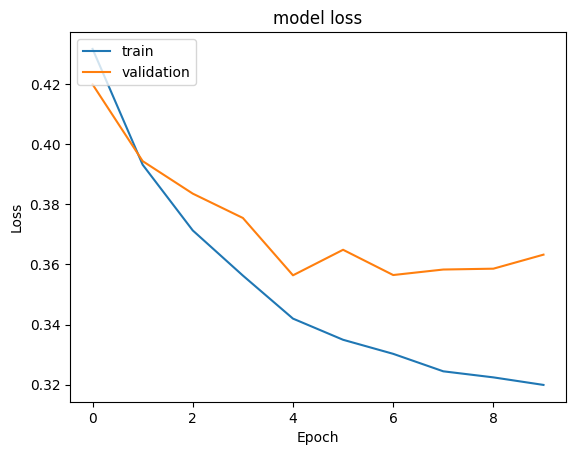

In [74]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

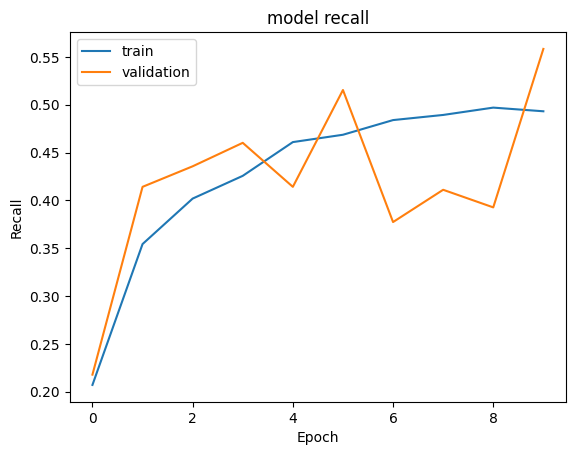

In [75]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [76]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [77]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [78]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [79]:
train_metric_df, valid_metric_df

(                recall
 NN with SGD   0.023006
 NN with Adam  0.597393,
                 recall
 NN with SGD   0.021472
 NN with Adam  0.558282)

**Classification report**

In [80]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      5096
         1.0       0.66      0.60      0.63      1304

    accuracy                           0.86      6400
   macro avg       0.78      0.76      0.77      6400
weighted avg       0.85      0.86      0.85      6400



In [81]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      1274
         1.0       0.63      0.56      0.59       326

    accuracy                           0.84      1600
   macro avg       0.76      0.74      0.75      1600
weighted avg       0.84      0.84      0.84      1600



**Confusion matrix**

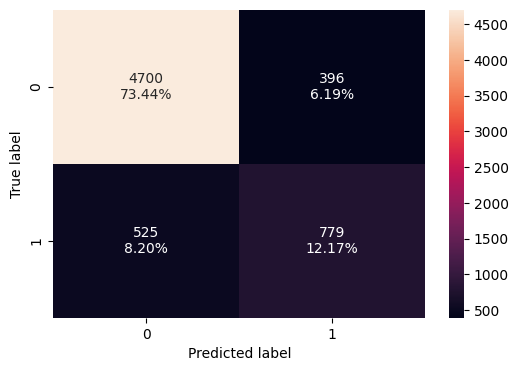

In [82]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

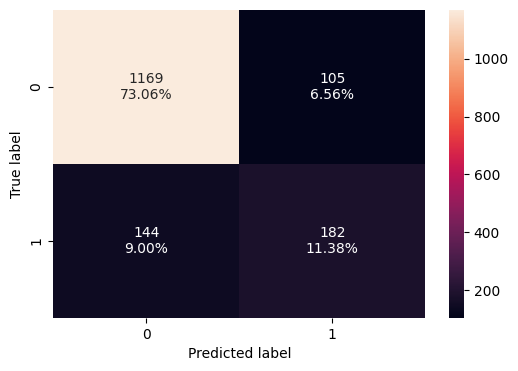

In [83]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Adam Optimizer and Dropout

In [84]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [85]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(64, activation='relu'))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(128, activation='relu'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(64,activation='relu'))
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [86]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
metric = 'Recall'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [87]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [88]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 6

In [89]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ##Complete the code to specify the batch size.
    epochs=100, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.4618 - recall: 0.0307 - val_loss: 0.4382 - val_recall: 0.0337
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4304 - recall: 0.2063 - val_loss: 0.4189 - val_recall: 0.2086
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4222 - recall: 0.2339 - val_loss: 0.4148 - val_recall: 0.2699
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4118 - recall: 0.2768 - val_loss: 0.4184 - val_recall: 0.4571
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4089 - recall: 0.2968 - val_loss: 0.4009 - val_recall: 0.2454
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3987 - recall: 0.3167 - val_loss: 0.4027 - val_recall: 0.4294
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3966 - recall: 0.3374 - val_loss: 0.3845 - val_recall: 0.3344
Epoch 8/100
200/200 [======

**Loss function**

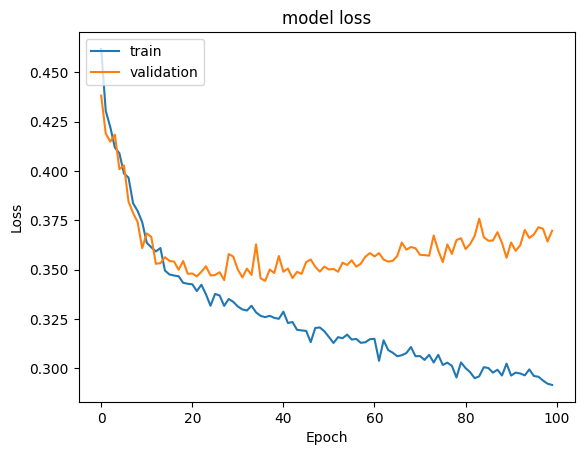

In [90]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

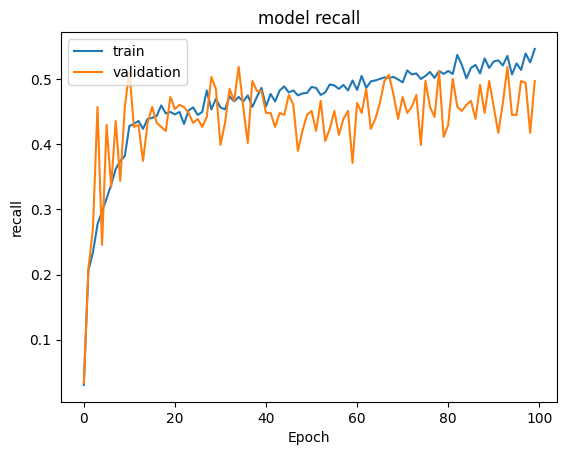

In [91]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [92]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [93]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [94]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [95]:
train_metric_df, valid_metric_df

(                          recall
 NN with SGD             0.023006
 NN with Adam            0.597393
 NN with Adam & Dropout  0.620399,
                           recall
 NN with SGD             0.021472
 NN with Adam            0.558282
 NN with Adam & Dropout  0.496933)

**Classification report**

In [96]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      5096
         1.0       0.85      0.62      0.72      1304

    accuracy                           0.90      6400
   macro avg       0.88      0.80      0.83      6400
weighted avg       0.90      0.90      0.89      6400



In [97]:
#classification report
cr = classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      1274
         1.0       0.70      0.50      0.58       326

    accuracy                           0.85      1600
   macro avg       0.79      0.72      0.75      1600
weighted avg       0.84      0.85      0.85      1600



**Confusion matrix**

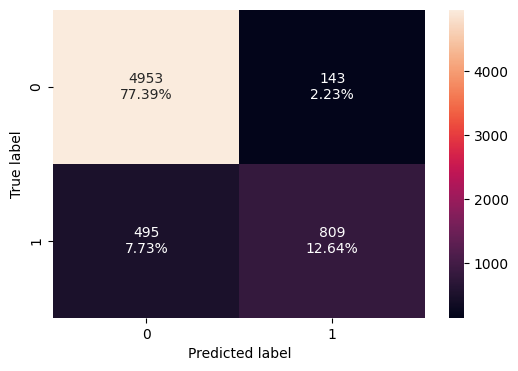

In [98]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

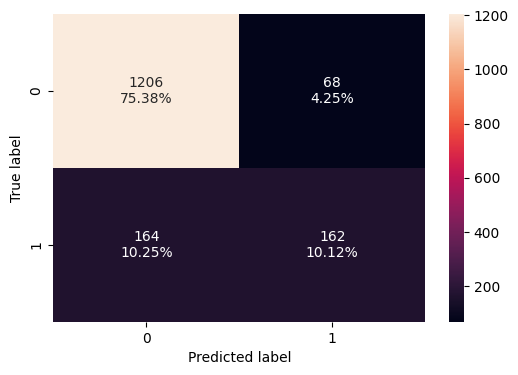

In [99]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [100]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



Let's build a model with the balanced dataset

In [101]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [102]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32, activation='relu', input_dim=X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [103]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
metric = 'Recall'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [104]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [105]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=10, ## Complete the code to specify the batch size to use
    epochs=10, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/10
1020/1020 [==============================] - 3s 2ms/step - loss: 0.6995 - recall: 0.9184 - val_loss: 0.7146 - val_recall: 0.9080
Epoch 2/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.6901 - recall: 0.8130 - val_loss: 0.6827 - val_recall: 0.6902
Epoch 3/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.6766 - recall: 0.6591 - val_loss: 0.6502 - val_recall: 0.5982
Epoch 4/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.6641 - recall: 0.6156 - val_loss: 0.6299 - val_recall: 0.6104
Epoch 5/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.6522 - recall: 0.6124 - val_loss: 0.6155 - val_recall: 0.6012
Epoch 6/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.6403 - recall: 0.6256 - val_loss: 0.6045 - val_recall: 0.5859
Epoch 7/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.6281 - recall: 0.6409 - val_loss: 0.5979 - val_recall: 0.6135
Epoch 8/10
1020/1020

**Loss function**

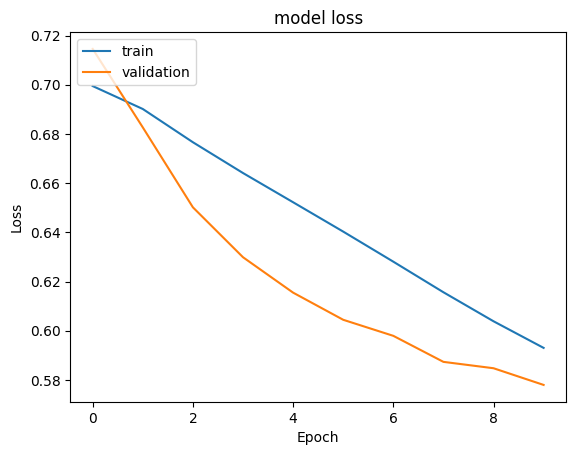

In [107]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

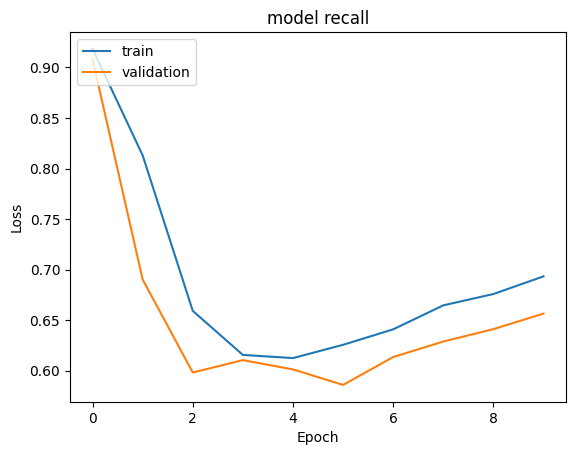

In [108]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [109]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [110]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [111]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [112]:
train_metric_df, valid_metric_df

(                          recall
 NN with SGD             0.023006
 NN with Adam            0.597393
 NN with Adam & Dropout  0.620399
 NN with SMOTE & SGD     0.697802,
                           recall
 NN with SGD             0.021472
 NN with Adam            0.558282
 NN with Adam & Dropout  0.496933
 NN with SMOTE & SGD     0.656442)

**Classification report**

In [113]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70      5096
         1.0       0.70      0.70      0.70      5096

    accuracy                           0.70     10192
   macro avg       0.70      0.70      0.70     10192
weighted avg       0.70      0.70      0.70     10192



In [114]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.70      0.79      1274
         1.0       0.36      0.66      0.47       326

    accuracy                           0.69      1600
   macro avg       0.63      0.68      0.63      1600
weighted avg       0.78      0.69      0.72      1600



**Confusion matrix**

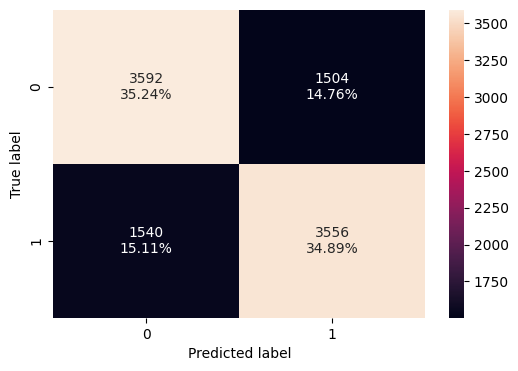

In [115]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

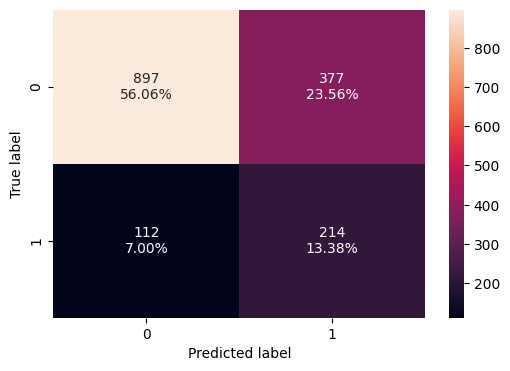

In [116]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [117]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [118]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [119]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
metric = 'Recall'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [121]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [122]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=10, ## Complete the code to specify the batch size to use
    epochs=10,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/10
1020/1020 [==============================] - 4s 2ms/step - loss: 0.5721 - recall: 0.7272 - val_loss: 0.5607 - val_recall: 0.7086
Epoch 2/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.5152 - recall: 0.7522 - val_loss: 0.4980 - val_recall: 0.6810
Epoch 3/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4684 - recall: 0.7732 - val_loss: 0.4805 - val_recall: 0.7147
Epoch 4/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4450 - recall: 0.7891 - val_loss: 0.4603 - val_recall: 0.6871
Epoch 5/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4306 - recall: 0.7934 - val_loss: 0.5056 - val_recall: 0.7393
Epoch 6/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4195 - recall: 0.8012 - val_loss: 0.4680 - val_recall: 0.6963
Epoch 7/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4146 - recall: 0.8042 - val_loss: 0.4662 - val_recall: 0.7117
Epoch 8/10
1020/1020

**Loss function**

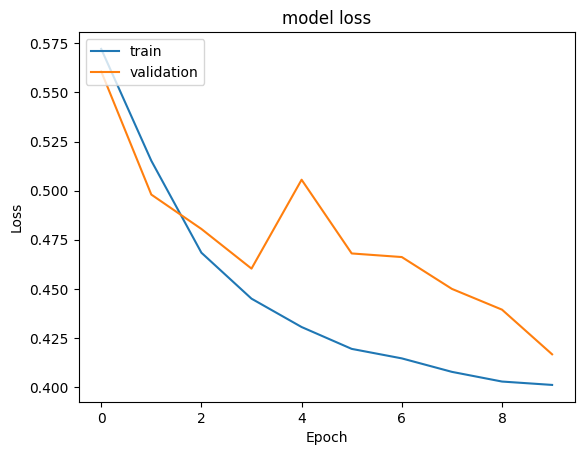

In [124]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

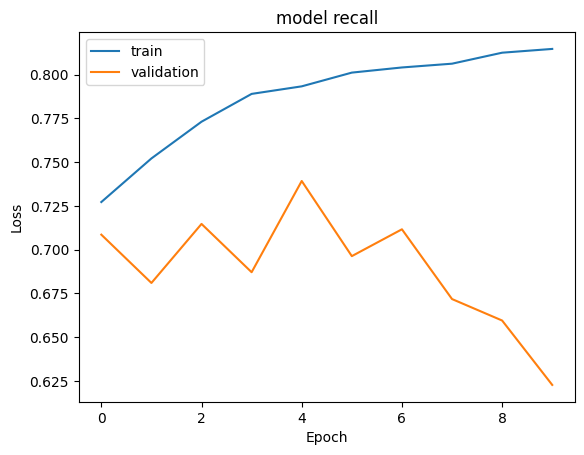

In [125]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [126]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 1s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [127]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [128]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [129]:
train_metric_df,valid_metric_df

(                          recall
 NN with SGD             0.023006
 NN with Adam            0.597393
 NN with Adam & Dropout  0.620399
 NN with SMOTE & SGD     0.697802
 NN with SMOTE & Adam    0.751570,
                           recall
 NN with SGD             0.021472
 NN with Adam            0.558282
 NN with Adam & Dropout  0.496933
 NN with SMOTE & SGD     0.656442
 NN with SMOTE & Adam    0.622699)

**Classification report**

In [130]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83      5096
         1.0       0.86      0.75      0.80      5096

    accuracy                           0.82     10192
   macro avg       0.82      0.82      0.81     10192
weighted avg       0.82      0.82      0.81     10192



In [131]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1274
         1.0       0.55      0.62      0.58       326

    accuracy                           0.82      1600
   macro avg       0.72      0.75      0.73      1600
weighted avg       0.83      0.82      0.82      1600



**Confusion matrix**

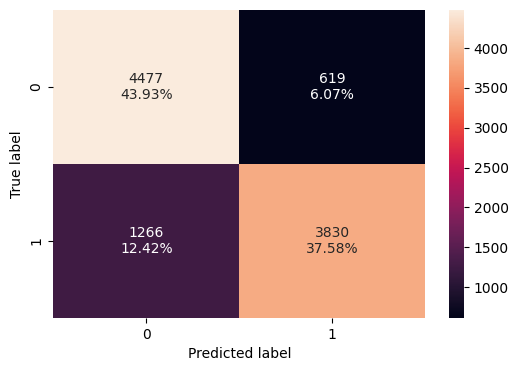

In [132]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

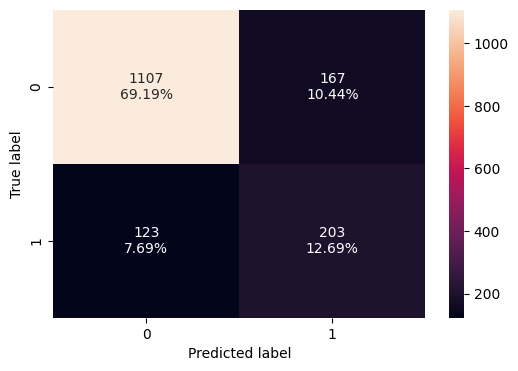

In [133]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [134]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [135]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.2))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(16,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [136]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
metric = 'Recall'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [137]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [138]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [139]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=10, ## Complete the code to specify the batch size to use
    epochs=10, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/10
1020/1020 [==============================] - 4s 3ms/step - loss: 0.5969 - recall: 0.7023 - val_loss: 0.5696 - val_recall: 0.6933
Epoch 2/10
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5595 - recall: 0.7331 - val_loss: 0.5231 - val_recall: 0.6687
Epoch 3/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.5352 - recall: 0.7376 - val_loss: 0.5145 - val_recall: 0.6656
Epoch 4/10
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5149 - recall: 0.7380 - val_loss: 0.4915 - val_recall: 0.6656
Epoch 5/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4973 - recall: 0.7543 - val_loss: 0.5234 - val_recall: 0.7239
Epoch 6/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4823 - recall: 0.7588 - val_loss: 0.4936 - val_recall: 0.7117
Epoch 7/10
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4774 - recall: 0.7657 - val_loss: 0.4769 - val_recall: 0.7117
Epoch 8/10
1020/1020

**Loss function**

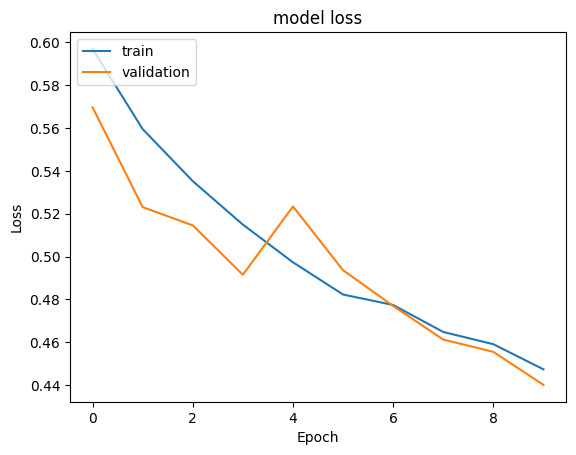

In [140]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

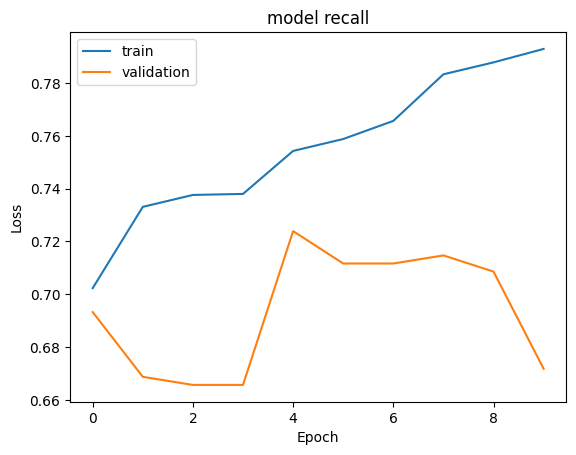

In [141]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [142]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [143]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [144]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [145]:
train_metric_df, valid_metric_df

(                                recall
 NN with SGD                   0.023006
 NN with Adam                  0.597393
 NN with Adam & Dropout        0.620399
 NN with SMOTE & SGD           0.697802
 NN with SMOTE & Adam          0.751570
 NN with SMOTE,Adam & Dropout  0.784537,
                                 recall
 NN with SGD                   0.021472
 NN with Adam                  0.558282
 NN with Adam & Dropout        0.496933
 NN with SMOTE & SGD           0.656442
 NN with SMOTE & Adam          0.622699
 NN with SMOTE,Adam & Dropout  0.671779)

**Classification report**

In [146]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      5096
         1.0       0.83      0.78      0.81      5096

    accuracy                           0.81     10192
   macro avg       0.81      0.81      0.81     10192
weighted avg       0.81      0.81      0.81     10192



In [147]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      1274
         1.0       0.51      0.67      0.58       326

    accuracy                           0.80      1600
   macro avg       0.71      0.75      0.72      1600
weighted avg       0.83      0.80      0.81      1600



**Confusion matrix**

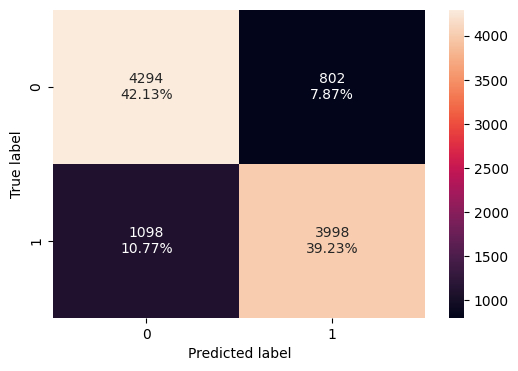

In [148]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

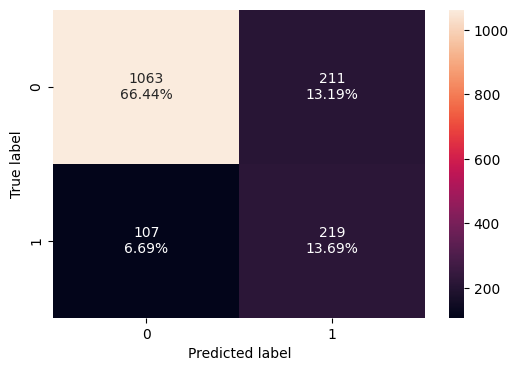

In [149]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [150]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.023006
NN with Adam,0.597393
NN with Adam & Dropout,0.620399
NN with SMOTE & SGD,0.697802
NN with SMOTE & Adam,0.751570
"NN with SMOTE,Adam & Dropout",0.784537


In [151]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.021472
NN with Adam,0.558282
NN with Adam & Dropout,0.496933
NN with SMOTE & SGD,0.656442
NN with SMOTE & Adam,0.622699
"NN with SMOTE,Adam & Dropout",0.671779


In [152]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.001534
NN with Adam,0.039110
NN with Adam & Dropout,0.123466
NN with SMOTE & SGD,0.041360
NN with SMOTE & Adam,0.128870
"NN with SMOTE,Adam & Dropout",0.112758


In [153]:
best_model = model_5

In [154]:
y_test_pred = best_model.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [155]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.52      0.70      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.83      0.81      0.82      2000



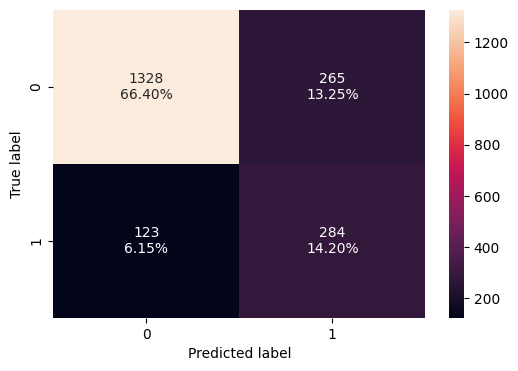

In [156]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

Actionable Insights
1. 
High Accuracy and Precision for Not Exited Customers: The model accurately identifies customers who are not likely to exit (Precision: 0.92), which helps in focusing resources effectively on customers at risk

2. 
Moderate Recall for Exited Customers: The recall for exited customers is 0.70, meaning the model can correctly identify 70% of the customers who are likely to exit. However, there's room for improvement to capture more of these at-risk customer

3. .
Balance Between Precision and Recall: For exited customers, the precision is 0.52, and the recall is 0.70. The F1-Score of 0.59 indicates a balance, but the lower precision suggests there are some false positives, i.e., customers predicted to exit but who actually do not.


## Business Recommendations
1) Targeted Retention Campaigns: Utilize the model to identify customers predicted to exit and prioritize retention efforts on these customers. Special offers, personalized communication, and loyalty programs can be used to reduce churn.

2) Enhance Model to Improve Precision: Consider additional features or more advanced modeling techniques to improve precision for the exited class. This will reduce false positives, making retention efforts more cost-effective.

3) Monitor High-Risk Segments: Continuously monitor segments of customers with higher predicted exit probabilities. Implement early intervention strategies, such as satisfaction surveys and proactive customer service, to address potential issues before they lead to churn.

4) Customer Feedback Loop: Implement a feedback loop from the retention campaigns to the modeling process. Use the outcomes of retention efforts to retrain and improve the model, ensuring it adapts to changing customer behavior.

5) Resource Allocation: Allocate resources efficiently by focusing on customers with the highest predicted risk of exit. Avoid spending excessive resources on customers who are unlikely to exit.

6) Periodic Model Evaluation: Regularly evaluate the model’s performance metrics and update the model as needed. This ensures the model remains effective over time, adapting to new data and trends.

By leveraging these insights and recommendations, the business can proactively manage customer churn, optimize retention strategies, and ultimately improve customer satisfaction and loyalty.